In [10]:
import numpy as np
from logistic_regression import *
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('../hw1/')
from gradient_descent import GradientDescent, quad, quadGrad
import scipy.io
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999

<IPython.core.display.Javascript object>

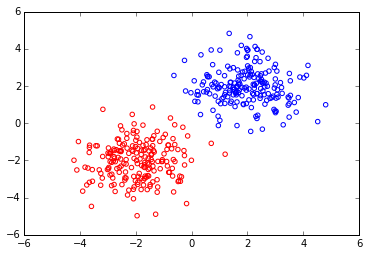

In [3]:
filename = "data_stdev1"
lr = LogisticRegression.fromFile(filename, type="train")
lr.plotData()

 
--- Minimization Summary --- 
x_min is = [-0.88248885  3.97829428  4.11363747]
f_min is = 0.607264842237
achieved tolerance = -9.99981798417e-05
numFunctionCalls = 4369
---------------------------- 
 
--- Classification Summary ---
w_full = [-0.88248885  3.97829428  4.11363747]
w_full normalized = [-0.15240802  0.68706134  0.71043544]
lambda = 0
number of entries missclassified = 0
missclassification rate  = 0.0
------------------



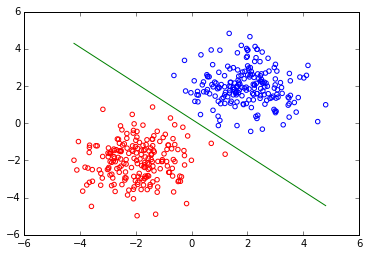

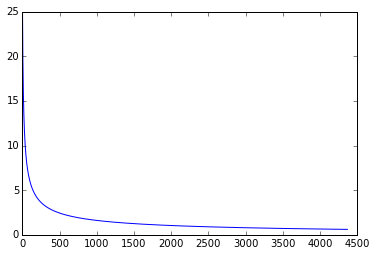

array([-0.88248885,  3.97829428,  4.11363747])

In [4]:
w_full = np.array([1,1,1])
lam = 0
lr.computeDecisionBoundary(w_full, lam, plot=True, printSummary=True, stepSize=0.001, plotIter=True)
# gd = lr.constructGradientDescentObject(lam)
# gd.stepSize = 0.02
# (w_star,_,_,_) = gd.computeMin(w_full, maxFunctionCalls=10000, storeIterValues=True, printSummary=True)
# print np.shape(w_star)
# gd.plotIterValues()
# print lr.NLL_Reg(w_star, lam)
# lr.plotData(w_full=w_star)


--------------------
data_nonsep

 
--- Minimization Summary --- 
x_min is = [ 0.00059789 -0.02473662 -0.02372558]
f_min is = 276.973426094
achieved tolerance = 9.99644912723e-05
numFunctionCalls = 1014
---------------------------- 
 
--- Classification Summary ---
w_full = [ 0.00059789 -0.02473662 -0.02372558]
w_full normalized = [ 0.01744112 -0.72159186 -0.69209898]
lambda = 0.0
number of entries missclassified = 194
missclassification rate  = 0.485
------------------



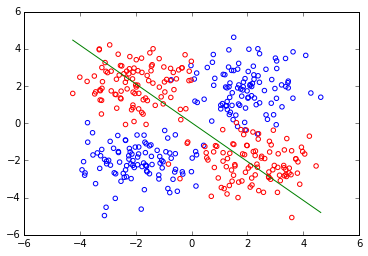

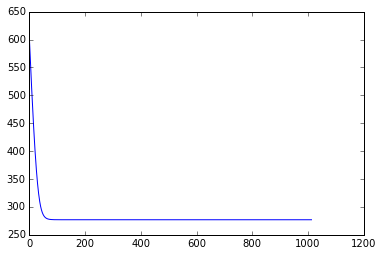

number of entries missclassified = 194
missclassification rate  = 0.485
--------------------


--------------------
data_nonsep

 
--- Minimization Summary --- 
x_min is = [ 0.00028799 -0.01213598 -0.0117482 ]
f_min is = 277.118127819
achieved tolerance = 9.96084349547e-05
numFunctionCalls = 909
---------------------------- 
 
--- Classification Summary ---
w_full = [ 0.00028799 -0.01213598 -0.0117482 ]
w_full normalized = [ 0.01704761 -0.71838825 -0.69543347]
lambda = 250.0
number of entries missclassified = 194
missclassification rate  = 0.485
------------------



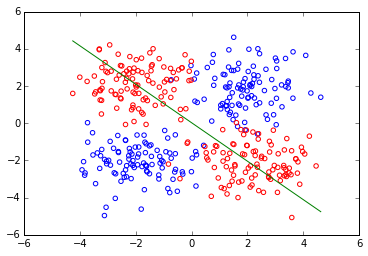

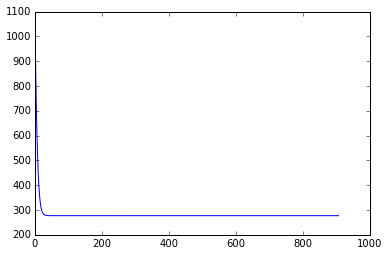

number of entries missclassified = 194
missclassification rate  = 0.485
--------------------


--------------------
data_nonsep

 
--- Minimization Summary --- 
x_min is = [ 0.00018986 -0.00804113 -0.00780997]
f_min is = 277.1654622
achieved tolerance = 9.97988185651e-05
numFunctionCalls = 858
---------------------------- 
 
--- Classification Summary ---
w_full = [ 0.00018986 -0.00804113 -0.00780997]
w_full normalized = [ 0.01693446 -0.71723943 -0.696621  ]
lambda = 500.0
number of entries missclassified = 194
missclassification rate  = 0.485
------------------



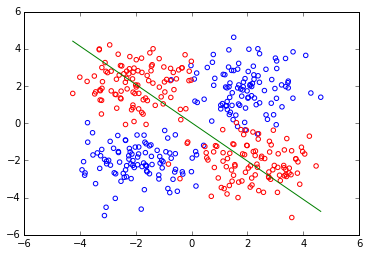

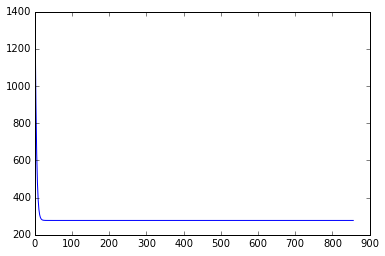

number of entries missclassified = 194
missclassification rate  = 0.485
--------------------


--------------------
data_nonsep

 
--- Minimization Summary --- 
x_min is = [ 0.00014172 -0.00601243 -0.00584951]
f_min is = 277.188969958
achieved tolerance = 9.96313634508e-05
numFunctionCalls = 824
---------------------------- 
 
--- Classification Summary ---
w_full = [ 0.00014172 -0.00601243 -0.00584951]
w_full normalized = [ 0.01689203 -0.71664867 -0.69722976]
lambda = 750.0
number of entries missclassified = 194
missclassification rate  = 0.485
------------------



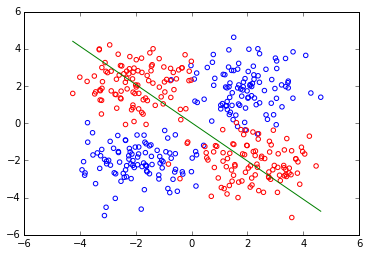

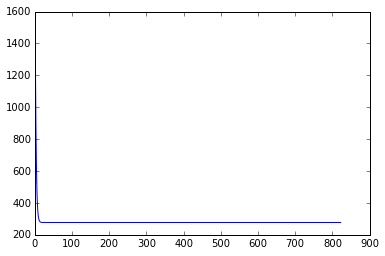

number of entries missclassified = 194
missclassification rate  = 0.485
--------------------


--------------------
data_nonsep

 
--- Minimization Summary --- 
x_min is = [ 0.00011313 -0.00480114 -0.00467587]
f_min is = 277.203024466
achieved tolerance = 9.96489510107e-05
numFunctionCalls = 798
---------------------------- 
 
--- Classification Summary ---
w_full = [ 0.00011313 -0.00480114 -0.00467587]
w_full normalized = [ 0.01687842 -0.71628875 -0.69759984]
lambda = 1000.0
number of entries missclassified = 194
missclassification rate  = 0.485
------------------



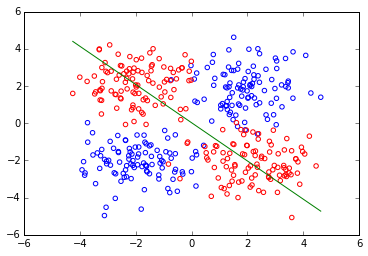

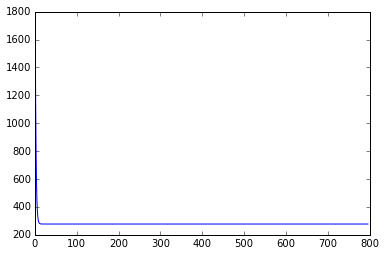

number of entries missclassified = 194
missclassification rate  = 0.485
--------------------



In [5]:


def trainModel(fileName, lam, type="train", plotTest=False, plotValidate=False, plotIter=False,
              useGradientCriterion=False, stepSize=0.0001, maxFunctionCalls=10000):
    print ""
    print "--------------------"
    print fileName
    print ""
    
    lr = LogisticRegression.fromFile(fileName, type=type)
    w_guess = np.array([0,-1,1])
    w_full = lr.computeDecisionBoundary(w_guess, lam, plot=True, printSummary=True, stepSize=stepSize, plotIter=plotIter,
                                       useGradientCriterion=useGradientCriterion, maxFunctionCalls=maxFunctionCalls)
    lr.classificationErrorRate(w_full, verbose=True)
    
    if plotTest:
        print ""
        print "--- " + fileName + " test set ---"
        lr_test = LogisticRegression.fromFile(fileName, type="test")
        lr_test.plotData(w_full=w_full)
        print " "
        print "--------------"
        lr_test.classificationErrorRate(w_full, verbose=True)
        print "--------------"
        print " "
    
    if plotValidate:
        print ""
        print "--- " + fileName + " validation set ---"
        lr_val = LogisticRegression.fromFile(fileName, type="validate")
        lr_val.plotData(w_full=w_full)
        print " "
        print "--------------"
        lr_val.classificationErrorRate(w_full, verbose=True)
        print "--------------"
        print " "
    print "--------------------"
    print ""
    
    return (w_full, lr)
        

        
filenames = ('data_stdev1', 'data_stdev2', 'data_stdev4', 'data_nonsep')
filenames = ('data_stdev1', 'data_stdev2', 'data_nonsep')
filenames = ('data_nonsep',)
lam = 0

# for fileName in filenames:
#     trainModel(fileName, lam, plotTest=True, plotValidate=True)
    
lam_grid = np.linspace(0,1000,5)
for fileName in filenames:
    for lam in lam_grid:
        trainModel(fileName, lam, plotIter=True, useGradientCriterion=True)
        
# lam = 2
# (w_full, lr) = trainModel('data_stdev1', lam, plotIter=False, useGradientCriterion=True, stepSize=0.01,
#                           maxFunctionCalls=10000)
# lr.NLL_Reg(10.0*w_full, lam)
# lr.NLL_Reg_grad(w_full, lam)

In [6]:
filename = "hw2_resources/data/data_titanic_" + "train" + ".csv"
T = scipy.io.loadmat(filename)['data']
X = np.array(T[:,0:-1])
Y = np.array(T[:,-1])
print np.shape(X)
print np.shape(Y)

(200, 11)
(200,)


In [11]:
lr = LogisticRegression.fromTitanic()
print np.shape(lr.x)

(200, 11)


In [13]:
1+2.1+7+4+3+3+2+4+2.3

28.400000000000002

In [15]:
3.9+1.3+3.5+4.7

13.399999999999999